# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Magnetization" data-toc-modified-id="Magnetization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Magnetization</a></div><div class="lev1 toc-item"><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Autocorrelation</a></div><div class="lev1 toc-item"><a href="#$\langle-m-\rangle$(T)" data-toc-modified-id="$\langle-m-\rangle$(T)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-1"><span class="MJXp-mo" id="MJXp-Span-2" style="margin-left: 0em; margin-right: 0em;">⟨</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-3">m</span><span class="MJXp-mo" id="MJXp-Span-4" style="margin-left: 0em; margin-right: 0em;">⟩</span></span></span><span class="MathJax MathJax_Processing" id="MathJax-Element-1-Frame" tabindex="0"></span><script type="math/tex" id="MathJax-Element-1">\langle m \rangle</script>(T)</a></div><div class="lev1 toc-item"><a href="#$\chi(T)$" data-toc-modified-id="$\chi(T)$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-5"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-6">χ</span><span class="MJXp-mo" id="MJXp-Span-7" style="margin-left: 0em; margin-right: 0em;">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-8">T</span><span class="MJXp-mo" id="MJXp-Span-9" style="margin-left: 0em; margin-right: 0em;">)</span></span></span><span class="MathJax MathJax_Processing" id="MathJax-Element-2-Frame" tabindex="0"></span><script type="math/tex" id="MathJax-Element-2">\chi(T)</script></a></div><div class="lev1 toc-item"><a href="#Finitse-size-scaling" data-toc-modified-id="Finitse-size-scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finitse-size scaling</a></div>

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '../script')
import matplotlib.pyplot as plt
import numpy as np
from fileoperations import ReadFile, SplitData
import os
import random as rand

In [2]:
data_dir = "../data/"

In [8]:
# Mac
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 20

In [116]:
#unfinished
def Bootstrap(n, data, func, *args):
    N = data.size
    rand.seed(600)
    values = []
    for i in range(0, n):
        new_data = []
        for i in range(0, N):
            new_data.append(data[rand.randint(0, N-1)])
        new_data = np.array(new_data, dtype=np.float64)
        values.append(func(new_data, *args))
    print(values)

# Magnetization

{'L': 60.0, 'T': 0.5}
[    8.   -56.   -70. ...,  1660.  1670.  1672.]


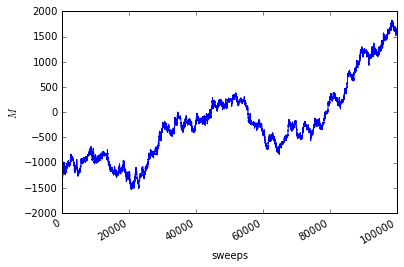

In [6]:
header, [t, E, M] = ReadFile(data_dir + "M_60_0.500.dat", 1, " ")
print(header)
print(M)
fig, ax = plt.subplots()
ax.set_xlabel("sweeps")
ax.set_ylabel(r"$M$")
ax.plot(t, M)
fig.autofmt_xdate()
plt.show()

{'L': 100.0, 'T': 2.25}
[   86.   166.   216. ...,  5442.  5574.  5430.]


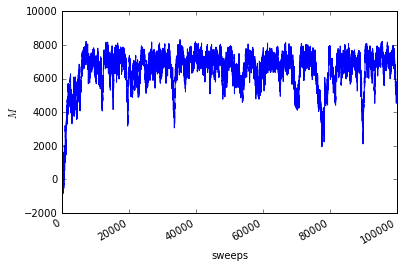

In [3]:
header, [t, E, M] = ReadFile(data_dir + "M_100_2.250.dat", 1, " ")
print(header)
print(M)
fig, ax = plt.subplots()
ax.set_xlabel("sweeps")
ax.set_ylabel(r"$M$")
ax.plot(t, M)
fig.autofmt_xdate()
plt.show()

# Autocorrelation

{'L': 100.0, 'T': 0.5}
[  3.18792298e-03   3.18316009e-03   3.17862466e-03 ...,  -2.87151084e-05
  -2.87151084e-05  -2.87151084e-05]


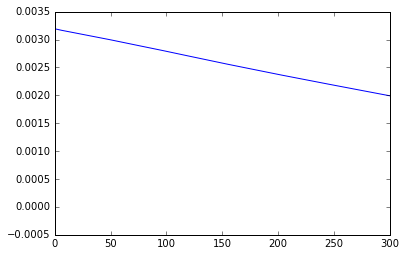

In [5]:
header, [t, E, M] = ReadFile(data_dir + "M_100_0.500.dat", 1, " ")
print(header)
m = M/(header['L']**2)
m -= np.mean(m)
m_hat = np.fft.fft(m)
m_hat_abs = np.abs(m_hat)**2
corr = np.fft.ifft(m_hat_abs)
corr /= M.size
corr = np.real(corr)
print(corr[:int(M.size/2)])
fig, ax = plt.subplots()
ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)])
plt.show()

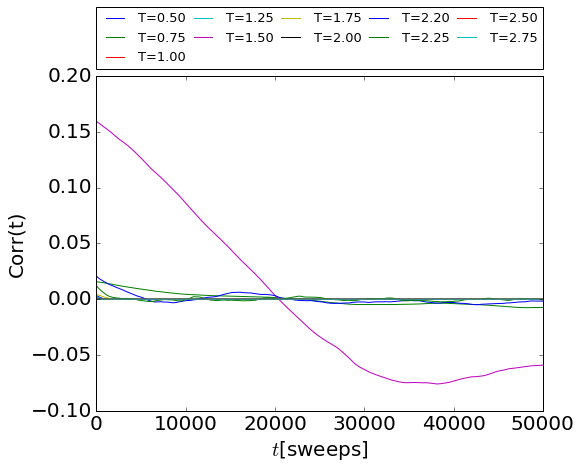

In [42]:
files = os.listdir(data_dir)
M_100_files = []
for element in files:
    if element[:5] == "M_100":
        M_100_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
for element in M_100_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

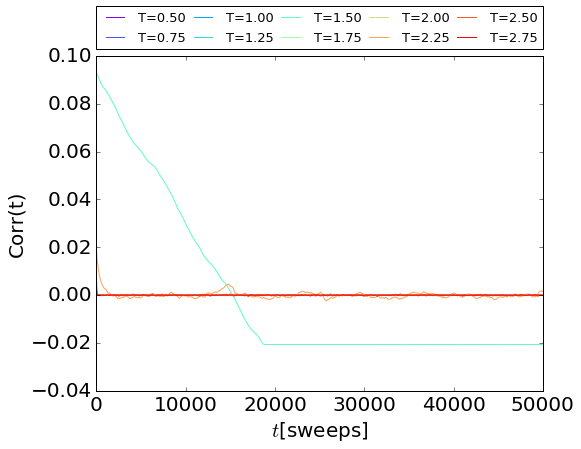

In [45]:
files = os.listdir(data_dir)
M_50_files = []
for element in files:
    if element[:5] == "M_50_":
        M_50_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
NUM_COLORS = len(M_50_files)
color=iter(plt.cm.rainbow(np.linspace(0,1,NUM_COLORS)))
for element in M_50_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    c=next(color)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], c=c, label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

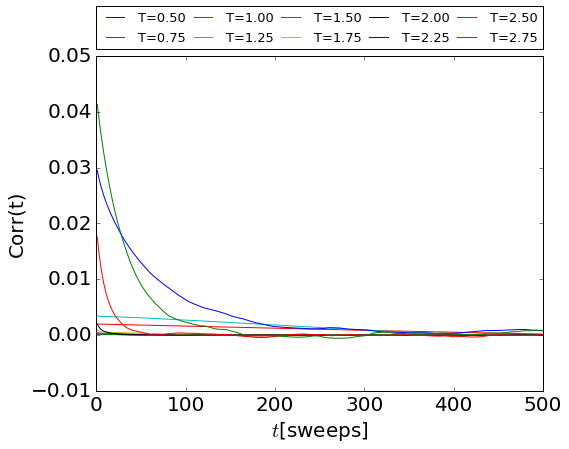

In [9]:
files = os.listdir(data_dir)
M_20_files = []
for element in files:
    if element[:5] == "M_20_":
        M_20_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
for element in M_20_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
ax.set_xlim(0., 500)
plt.show()

# $\langle m \rangle$(T)

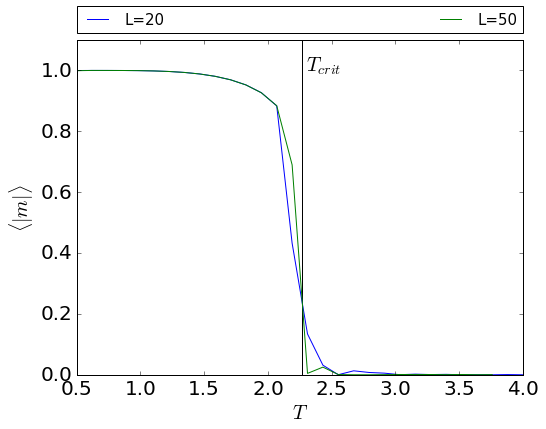

In [120]:
header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")

font = {'size': 20}

data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\langle\vert m \vert\rangle$")
ax.vlines(2.27, 0, 1.1)
ax.text(2.3, 1., r"$T_{crit}$", fontdict=font)
for element in data:
    L = element[0][0]
    m = np.abs(element[2])/L**2
    ax.plot(element[1], np.abs(element[2])/L**2, label="L=%d" %L)
ax.set_xlim(0.5, 4.)
ax.set_ylim(0., 1.1)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", 
          borderaxespad=0., fontsize="15")
plt.show()

# $\chi(T)$

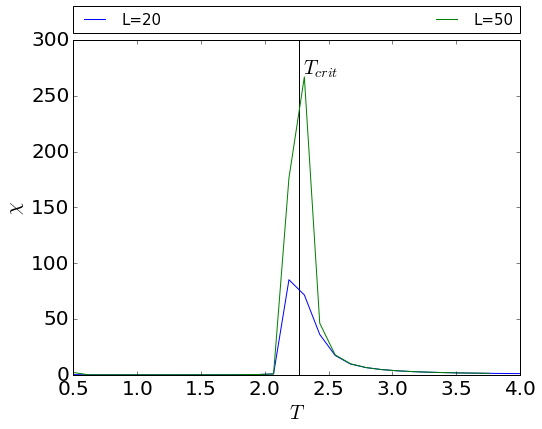

In [119]:
header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")

font = {'size': 20}

data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\chi$")
ax.vlines(2.27, 0, 300)
ax.text(2.3, 270, r"$T_{crit}$", fontdict=font)
for element in data:
    L = element[0][0]
    chi = element[3]/element[1]/L**2
    ax.plot(element[1], chi, label="L=%d" %L)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", 
          borderaxespad=0., fontsize="15")
plt.show()

# Finitse-size scaling

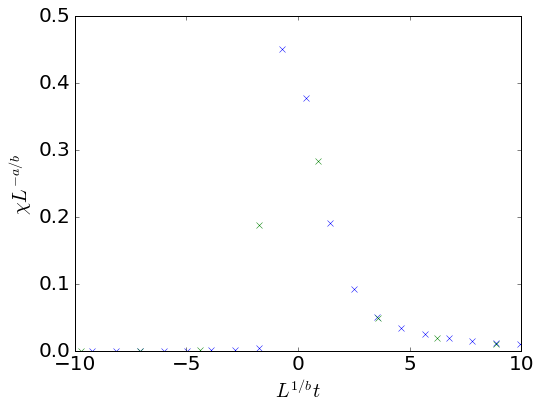

In [114]:
T_crit = 2.269
a = 7/4
b = 1

header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")
data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_ylabel(r"$\chi L^{-a/b}$")
ax.set_xlabel(r"$L^{1/b} t$")
for element in data:
    L = element[0][0]
    chi = element[3]/element[1]/L**2
    t = (element[1] - T_crit)/T_crit
    ax.plot(L**(1/b)*t ,chi*L**(-a/b), 'x')
ax.set_xlim(-10., 10.)
plt.show()